### Decision Tree with Python

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import seaborn as sns

import graphviz
import pydotplus
import io
import imageio
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Spotify Song Attributes EDA

In [2]:
data = pd.read_csv('datasets_1833_3172_data.csv')

In [3]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [4]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [6]:
train, test = train_test_split(data, test_size=0.15)

In [7]:
print("Train size: {} - Test size: {}".format(len(train), len(test)))

Train size: 1714 - Test size: 303


In [8]:
# custom color palette
red_blue = ['#19B5FE', '#EF4836']
palette = sns.color_palette(red_blue)
sns.set_style("white")

In [9]:
pos_tempo = data[data['target'] == 1]['tempo']
neg_tempo = data[data['target'] == 0]['tempo']
pos_dance = data[data['target'] == 1]['danceability']
neg_dance = data[data['target'] == 0]['danceability']
pos_duration = data[data['target'] == 1]['duration_ms']
neg_duration = data[data['target'] == 0]['duration_ms']
pos_loudness = data[data['target'] == 1]['loudness']
neg_loudness = data[data['target'] == 0]['loudness']
pos_speechiness = data[data['target'] == 1]['speechiness']
neg_speechiness = data[data['target'] == 0]['speechiness']
pos_valence = data[data['target'] == 1]['valence']
neg_valence = data[data['target'] == 0]['valence']
pos_energy = data[data['target'] == 1]['energy']
neg_energy = data[data['target'] == 0]['energy']
pos_acousticness = data[data['target'] == 1]['acousticness']
neg_acousticness = data[data['target'] == 0]['acousticness']
pos_key = data[data['target'] == 1]['key']
neg_key = data[data['target'] == 0]['key']
pos_instrumentalness = data[data['target'] == 1]['instrumentalness']
neg_instrumentalness = data[data['target'] == 0]['instrumentalness']

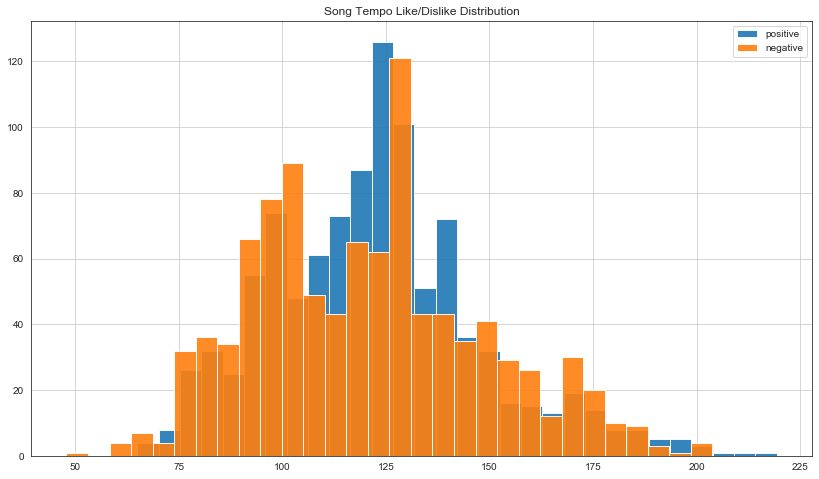

In [10]:
fig = plt.figure(figsize=(14,8))
plt.title('Song Tempo Like/Dislike Distribution')
pos_tempo.hist(alpha=0.9, bins=30, label='positive')
neg_tempo.hist(alpha=0.9, bins=30, label='negative')
plt.legend(loc="upper right")

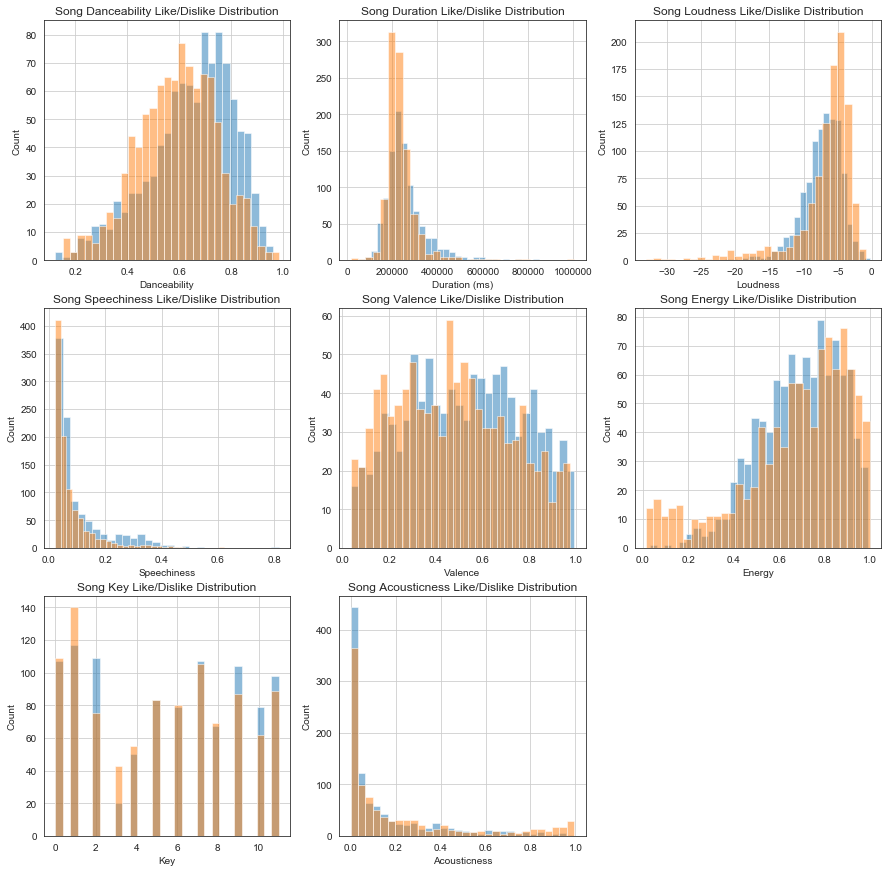

In [11]:
fig2 = plt.figure(figsize=(15, 15))

# Danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel("Danceability")
ax3.set_ylabel("Count")
ax3.set_title("Song Danceability Like/Dislike Distribution")
pos_dance.hist(alpha=0.5, bins=30)
ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha=0.5, bins=30)

# Duration
ax5 = fig2.add_subplot(332)
pos_duration.hist(alpha=0.5, bins=30)
ax5.set_xlabel("Duration (ms)")
ax5.set_ylabel("Count")
ax5.set_title("Song Duration Like/Dislike Distribution")
ax6 = fig2.add_subplot(332)
neg_duration.hist(alpha=0.5, bins=30)

# Loudness
ax7 = fig2.add_subplot(333)
pos_loudness.hist(alpha=0.5, bins=30)
ax7.set_xlabel("Loudness")
ax7.set_ylabel("Count")
ax7.set_title("Song Loudness Like/Dislike Distribution")
ax8 = fig2.add_subplot(333)
neg_loudness.hist(alpha=0.5, bins=30)

# Speechiness
ax9 = fig2.add_subplot(334)
pos_speechiness.hist(alpha=0.5, bins=30)
ax9.set_xlabel("Speechiness")
ax9.set_ylabel("Count")
ax9.set_title("Song Speechiness Like/Dislike Distribution")
ax10 = fig2.add_subplot(334)
neg_speechiness.hist(alpha=0.5, bins=30)

# Valence
ax11 = fig2.add_subplot(335)
pos_valence.hist(alpha=0.5, bins=30)
ax11.set_xlabel("Valence")
ax11.set_ylabel("Count")
ax11.set_title("Song Valence Like/Dislike Distribution")
ax12 = fig2.add_subplot(335)
neg_valence.hist(alpha=0.5, bins=30)

# Energy
ax13 = fig2.add_subplot(336)
pos_energy.hist(alpha=0.5, bins=30)
ax13.set_xlabel("Energy")
ax13.set_ylabel("Count")
ax13.set_title("Song Energy Like/Dislike Distribution")
ax14 = fig2.add_subplot(336)
neg_energy.hist(alpha=0.5, bins=30)

# Key
ax15 = fig2.add_subplot(337)
pos_key.hist(alpha=0.5, bins=30)
ax15.set_xlabel("Key")
ax15.set_ylabel("Count")
ax15.set_title("Song Key Like/Dislike Distribution")
ax16 = fig2.add_subplot(337)
neg_key.hist(alpha=0.5, bins=30)

# Acousticness
ax16 = fig2.add_subplot(338)
pos_acousticness.hist(alpha=0.5, bins=30)
ax16.set_xlabel("Acousticness")
ax16.set_ylabel("Count")
ax16.set_title("Song Acousticness Like/Dislike Distribution")
ax17 = fig2.add_subplot(338)
neg_acousticness.hist(alpha=0.5, bins=30)

In [12]:
c = DecisionTreeClassifier(min_samples_split=100)

In [13]:
features = ['danceability', 'loudness', 'valence', 'energy', 'instrumentalness', 'acousticness', 'key', 'speechiness', 'duration_ms']

In [14]:
X_train = train[features]
y_train = train['target']

X_test = train[features]
y_test = train['target']

In [15]:
dt = c.fit(X_train, y_train)

In [16]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)

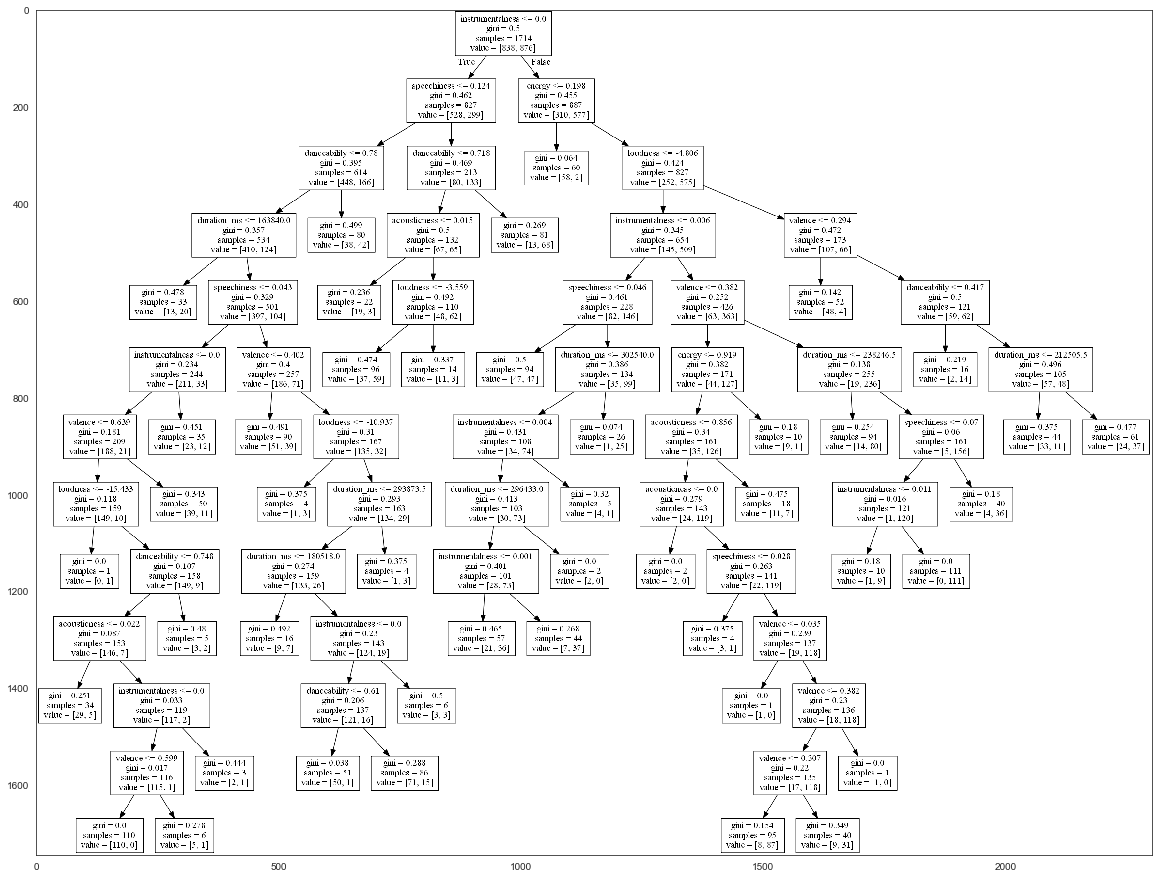

In [17]:
show_tree(dt, features, 'dec_tree_01.png')

In [18]:
y_pred = c.predict(X_test)

In [19]:
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
score = accuracy_score(y_test, y_pred) * 100

In [22]:
print("Accuracy using Decision Tree: ", round(score, 1), "%")

Accuracy using Decision Tree:  78.4 %
